In [ ]:
pip install citipy

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
from pprint import pprint

from config import weather_api
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api}&units=imperial&q='

# small scale testing before I call 600+ APIs
response = requests.get(url+cities[0]).json()
pprint(response)
new_df = pd.DataFrame()
x = 1

weather_dict = {'City' : response['name'], 'Cloudiness' : response['clouds']['all'], 
                'Country' : response['sys']['country'], 'Date' :response['dt'],
                'Humidity' :response['main']['humidity'], 'Lat' : response['coord']['lat'], 
                'Lng' : response['coord']['lon'], 'Max Temp' :response['main']['temp_max'], 
                'Wind Speed' :response['wind']['speed']}
df = pd.DataFrame(weather_dict, index=[x])
new_df = new_df.append(df)
new_df = new_df.append(df)
new_df

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': -54.8, 'lon': -68.3},
 'dt': 1580168236,
 'id': 3833367,
 'main': {'feels_like': 33.31,
          'humidity': 87,
          'pressure': 987,
          'temp': 48.2,
          'temp_max': 48.2,
          'temp_min': 48.2},
 'name': 'Ushuaia',
 'sys': {'country': 'AR',
         'id': 8303,
         'sunrise': 1580114711,
         'sunset': 1580172377,
         'type': 1},
 'timezone': -10800,
 'visibility': 6000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 230, 'speed': 24.16}}


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Ushuaia,75,AR,1580168236,87,-54.8,-68.3,48.2,24.16
1,Ushuaia,75,AR,1580168236,87,-54.8,-68.3,48.2,24.16


In [4]:
x = 1
print('Begin Data Retrieval')
print('--------------------------------')
x_df = pd.DataFrame()

for index in cities:
    try:
        response = requests.get(url+index).json()
        print(f'Processing Record {x} of {len(cities)} | {index}')
        time.sleep(0.5)
        weather_dict = {'City' : response['name'], 'Cloudiness' : response['clouds']['all'], 
                'Country' : response['sys']['country'], 'Date' :response['dt'],
                'Humidity' :response['main']['humidity'], 'Lat' : response['coord']['lat'], 
                'Lng' : response['coord']['lon'], 'Max Temp' :response['main']['temp_max'], 
                'Wind Speed' :response['wind']['speed']}
        df = pd.DataFrame(weather_dict, index=[x])
        x_df = x_df.append(df)
        
    except:
        print(f'City {index} not found. Skipping...')
    x = x + 1

print('--------------------------------')
print('End Data Retrieval')

Begin Data Retrieval
--------------------------------
Processing Record 1 of 610 | ushuaia
Processing Record 2 of 610 | balassagyarmat
Processing Record 3 of 610 | fortuna
Processing Record 4 of 610 | luderitz
Processing Record 5 of 610 | khatanga
Processing Record 6 of 610 | tuatapere
Processing Record 7 of 610 | cape town
Processing Record 8 of 610 | ucluelet
Processing Record 9 of 610 | kapaa
Processing Record 10 of 610 | port-gentil
Processing Record 11 of 610 | binzhou
Processing Record 12 of 610 | kamaishi
Processing Record 13 of 610 | hilo
Processing Record 14 of 610 | tuni
Processing Record 15 of 610 | albany
Processing Record 16 of 610 | rikitea
Processing Record 17 of 610 | muncar
Processing Record 18 of 610 | lata
Processing Record 19 of 610 | punta arenas
Processing Record 20 of 610 | nguiu
City nguiu not found. Skipping...
Processing Record 21 of 610 | upernavik
Processing Record 22 of 610 | hobart
Processing Record 23 of 610 | vaini
Processing Record 24 of 610 | east lond

Processing Record 191 of 610 | san angelo
Processing Record 192 of 610 | nouadhibou
Processing Record 193 of 610 | lajedo
Processing Record 194 of 610 | benghazi
Processing Record 195 of 610 | inirida
Processing Record 196 of 610 | shingu
Processing Record 197 of 610 | kuldur
Processing Record 198 of 610 | tura
Processing Record 199 of 610 | esperance
Processing Record 200 of 610 | evensk
Processing Record 201 of 610 | gat
Processing Record 202 of 610 | batemans bay
Processing Record 203 of 610 | aguimes
Processing Record 204 of 610 | planeta rica
Processing Record 205 of 610 | idrinskoye
Processing Record 206 of 610 | keffi
Processing Record 207 of 610 | aporawan
City aporawan not found. Skipping...
Processing Record 208 of 610 | guerrero negro
Processing Record 209 of 610 | lolua
City lolua not found. Skipping...
Processing Record 210 of 610 | paamiut
Processing Record 211 of 610 | gamba
Processing Record 212 of 610 | berbera
Processing Record 213 of 610 | nara
Processing Record 214 

Processing Record 379 of 610 | cherskiy
Processing Record 380 of 610 | sao paulo de olivenca
Processing Record 381 of 610 | tsihombe
City tsihombe not found. Skipping...
Processing Record 382 of 610 | hongjiang
Processing Record 383 of 610 | sur
Processing Record 384 of 610 | lensk
Processing Record 385 of 610 | ambilobe
Processing Record 386 of 610 | luwingu
Processing Record 387 of 610 | toccoa
Processing Record 388 of 610 | anadyr
Processing Record 389 of 610 | ketchikan
Processing Record 390 of 610 | sept-iles
Processing Record 391 of 610 | jujuy
City jujuy not found. Skipping...
Processing Record 392 of 610 | phra phutthabat
Processing Record 393 of 610 | meyungs
City meyungs not found. Skipping...
Processing Record 394 of 610 | kerman
Processing Record 395 of 610 | powell river
Processing Record 396 of 610 | middletown
Processing Record 397 of 610 | tynda
Processing Record 398 of 610 | belmonte
Processing Record 399 of 610 | victor harbor
Processing Record 400 of 610 | oistins
Pr

Processing Record 571 of 610 | jining
Processing Record 572 of 610 | great bend
Processing Record 573 of 610 | port hawkesbury
Processing Record 574 of 610 | uyemskiy
Processing Record 575 of 610 | lutkun
Processing Record 576 of 610 | urusha
Processing Record 577 of 610 | ati
Processing Record 578 of 610 | sibolga
Processing Record 579 of 610 | vanavara
Processing Record 580 of 610 | podgornoye
Processing Record 581 of 610 | sapulpa
Processing Record 582 of 610 | baykit
Processing Record 583 of 610 | bay roberts
Processing Record 584 of 610 | ust-kulom
Processing Record 585 of 610 | rawson
Processing Record 586 of 610 | north battleford
Processing Record 587 of 610 | crixas
Processing Record 588 of 610 | goundam
Processing Record 589 of 610 | kotma
Processing Record 590 of 610 | tual
Processing Record 591 of 610 | pangnirtung
Processing Record 592 of 610 | sangar
Processing Record 593 of 610 | teahupoo
Processing Record 594 of 610 | muros
Processing Record 595 of 610 | zlatoustovsk
Ci

In [1]:
# Checking for NaNs and saving the csv file
x_df["Date"] = pd.to_datetime(x_df["Date"], unit="s")
x_df.info()
x_df.head(25)
x_df.to_csv(output_data_file, index=False)

NameError: name 'pd' is not defined

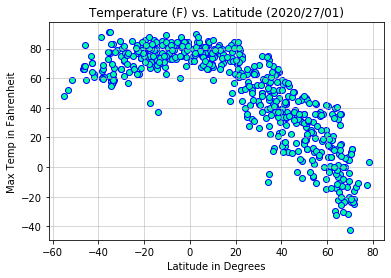

In [8]:
# Temperature (F) vs. Latitude
plt.scatter(x_df['Lat'], x_df['Max Temp'], c="#00ff9f", edgecolors="blue")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Max Temp in Fahrenheit')
plt.title('Temperature (F) vs. Latitude (2020/27/01)')
plt.savefig('output_data/Fig1.png')

#### Fig1 shows the correllation between Temperature as a function of Latitude. The closer the city is to the equator (0°), the warmer the maximum temperature, generally.

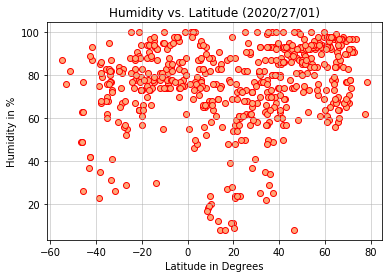

In [10]:
# Humidity (%) vs. Latitude
plt.scatter(x_df['Lat'], x_df['Humidity'], c="#fea877", edgecolors="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Humidity in %')
plt.title('Humidity vs. Latitude (2020/27/01)')
plt.savefig('output_data/Fig2.png')

#### Fig2 shows the current % humidity as a function of the city's latitude. The plot shows no clear correllation between the two, although there is a slight bias toward higher humidities.

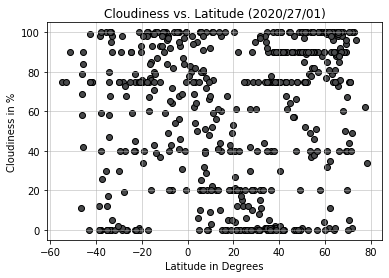

In [12]:
# Cloudiness (%) vs. Latitude
plt.scatter(x_df['Lat'], x_df['Cloudiness'], c="#48494b", edgecolors="black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Cloudiness in %')
plt.title('Cloudiness vs. Latitude (2020/27/01)')
plt.savefig('output_data/Fig3.png')

#### Fig3 shows the % cloudiness as a function of the city's latitude. There is no correllation between the two parameters, but there appear to be closters of cities with the same cloudiness at similar latitudes.

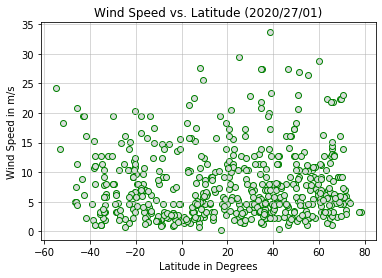

In [14]:
# Wind Speed (mph) vs. Latitude
plt.scatter(x_df['Lat'], x_df['Wind Speed'], c="#d9dddc", edgecolors="green")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Wind Speed in m/s')
plt.title('Wind Speed vs. Latitude (2020/27/01)')
plt.savefig('output_data/Fig4.png')

#### Fig4 shows the relationship between wind speed and a city's latitude. There is no correllation between the two, and the data shows a bias toward lower wind speeds.

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = x_df.loc[x_df['Lat'] >= 0]
south_hem = x_df.loc[x_df['Lat'] <= 0]
south_hem.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Ushuaia,75,AR,1580168236,87,-54.80,-68.30,48.20,24.16
4,Luderitz,0,NA,1580168507,55,-26.65,15.16,64.40,14.99
6,Tuatapere,79,NZ,1580168508,49,-46.13,167.68,66.00,5.01
7,Cape Town,68,ZA,1580168509,77,-33.93,18.42,62.01,9.17
10,Port-Gentil,20,GA,1580168511,88,-0.72,8.78,82.40,4.70


R value is -0.8718326985390568. P value is 5.076746118842985e-122.


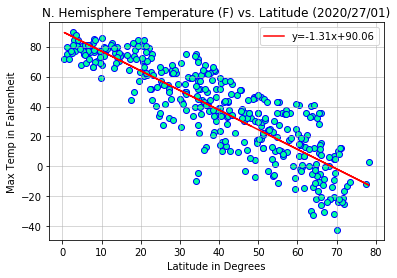

In [43]:
# Northern Hemisphere - Temperature (F) vs. Latitude
plt.scatter(north_hem['Lat'], north_hem['Max Temp'], c="#00ff9f", edgecolors="blue")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Max Temp in Fahrenheit')
plt.title('N. Hemisphere Temperature (F) vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(north_hem['Lat'], north_hem['Max Temp'])
line = slope * north_hem['Lat'] + intercept
plt.plot(north_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig1A.png')

R value is 0.46946918684352656. P value is 6.374229011975817e-11.


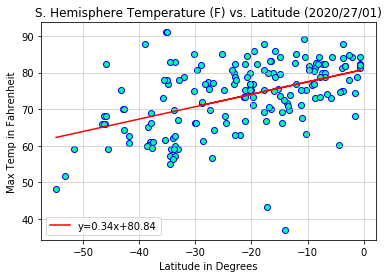

In [44]:
# Southern Hemisphere - Temperature (F) vs. Latitude
plt.scatter(south_hem['Lat'], south_hem['Max Temp'], c="#00ff9f", edgecolors="blue")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Max Temp in Fahrenheit')
plt.title('S. Hemisphere Temperature (F) vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(south_hem['Lat'], south_hem['Max Temp'])
line = slope * south_hem['Lat'] + intercept
plt.plot(south_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig1B.png')

#### In comparing the maximum temperatures from the Northern and Southern Hemispheres by their specific latitudes, there seems to be a much stronger correllation (R value) between temperature and latitude in the Northern Hemisphere.

R value is 0.340714289510968. P value is 4.9843353023790654e-12.


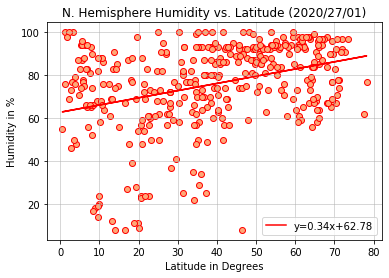

In [45]:
# Northern Hemisphere - Humidity (%) vs. Latitude
plt.scatter(north_hem['Lat'], north_hem['Humidity'], c="#fea877", edgecolors="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Humidity in %')
plt.title('N. Hemisphere Humidity vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(north_hem['Lat'], north_hem['Humidity'])
line = slope * north_hem['Lat'] + intercept
plt.plot(north_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig2A.png')

R value is 0.3828362439751409. P value is 1.8525040438303103e-07.


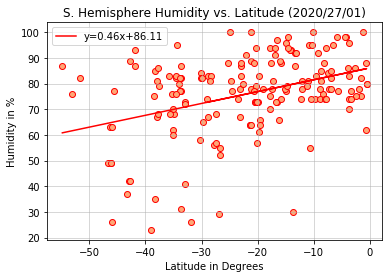

In [46]:
# Southern Hemisphere - Humidity (%) vs. Latitude
plt.scatter(south_hem['Lat'], south_hem['Humidity'], c="#fea877", edgecolors="red")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Humidity in %')
plt.title('S. Hemisphere Humidity vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(south_hem['Lat'], south_hem['Humidity'])
line = slope * south_hem['Lat'] + intercept
plt.plot(south_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig2B.png')

#### In comparing the percent humidities from the Northern and Southern Hemispheres by their specific latitudes, there again seems to be little to no correllation between the two.

R value is 0.28683082558668666. P value is 8.388232701281174e-09.


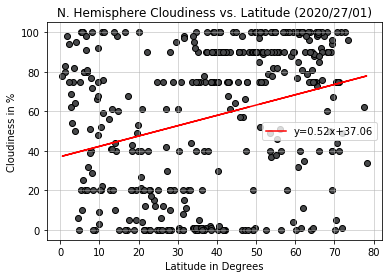

In [47]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
plt.scatter(north_hem['Lat'], north_hem['Cloudiness'], c="#48494b", edgecolors="black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Cloudiness in %')
plt.title('N. Hemisphere Cloudiness vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(north_hem['Lat'], north_hem['Cloudiness'])
line = slope * north_hem['Lat'] + intercept
plt.plot(north_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig3A.png')

R value is 0.24454022812043166. P value is 0.0011460646118831707.


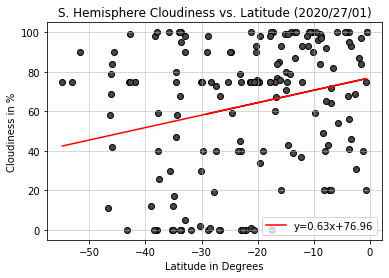

In [48]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude
plt.scatter(south_hem['Lat'], south_hem['Cloudiness'], c="#48494b", edgecolors="black")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Cloudiness in %')
plt.title('S. Hemisphere Cloudiness vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(south_hem['Lat'], south_hem['Cloudiness'])
line = slope * south_hem['Lat'] + intercept
plt.plot(south_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig3B.png')

#### In comparing the percent cloudiness from the Northern and Southern Hemispheres by their specific latitudes, there seems to be even less correllation between the two measures.

R value is 0.03652704492017682. P value is 0.47254319344099815.


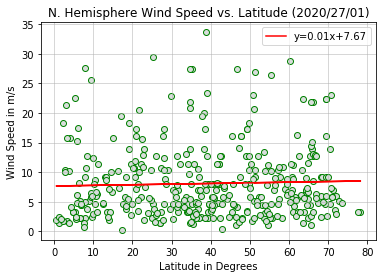

In [49]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
plt.scatter(north_hem['Lat'], north_hem['Wind Speed'], c="#d9dddc", edgecolors="green")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Wind Speed in m/s')
plt.title('N. Hemisphere Wind Speed vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(north_hem['Lat'], north_hem['Wind Speed'])
line = slope * north_hem['Lat'] + intercept
plt.plot(north_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig4A.png')

R value is -0.22408552119807346. P value is 0.0029540353543785016.


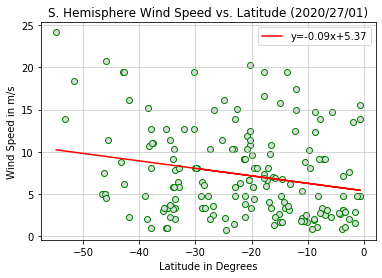

In [50]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
plt.scatter(south_hem['Lat'], south_hem['Wind Speed'], c="#d9dddc", edgecolors="green")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.xlabel('Latitude in Degrees')
plt.ylabel('Wind Speed in m/s')
plt.title('S. Hemisphere Wind Speed vs. Latitude (2020/27/01)')

slope, intercept, r_value, p_value, std_err = linregress(south_hem['Lat'], south_hem['Wind Speed'])
line = slope * south_hem['Lat'] + intercept
plt.plot(south_hem['Lat'], line, color='r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
print(f'R value is {r_value}. P value is {p_value}.')
plt.savefig('output_data/Fig4B.png')

#### In comparing the wind speeds from the Northern and Southern Hemispheres by their specific latitudes, there seems to be no correllation. A bias toward lower wind speeds is more obvious in the larger N. Hemisphere dataset.